In [ ]:
!pip install tabulate --quiet


In [ ]:
from datetime import datetime
import time
import matplotlib.pyplot as plt
from tabulate import tabulate


In [ ]:
# Rekursif
def hitung_nama_rekursif(nama):
    if not nama:
        return 0
    huruf = nama[0].upper()
    nilai = ord(huruf)-ord('A')+1 if 'A' <= huruf <= 'Z' else 0
    return nilai + hitung_nama_rekursif(nama[1:])

# Iteratif
def hitung_nama_iteratif(nama):
    total = 0
    for h in nama.upper():
        if 'A' <= h <= 'Z':
            total += ord(h)-ord('A')+1
    return total

# Hitung Hoki
def hitung_hoki(nilai_nama, tanggal):
    tgl = datetime.strptime(tanggal,"%Y-%m-%d")
    return (nilai_nama + tgl.day + tgl.month + tgl.year) % 100

# Komentar Hoki
def komentar_hoki(hoki):
    if hoki < 25:
        return "😵 Wah bro... hari ini kurang hoki"
    elif hoki < 50:
        return "😐 Lumayan, tapi belum hoki-hoki amat"
    elif hoki < 75:
        return "😎 Wah, hoki lu bro!"
    else:
        return "🔥 GOKIL! Ini hari SUPER hoki!"


In [ ]:
data_pengujian = []  # setiap elemen: dict {Nama, Tanggal, Hoki, Waktu_Iteratif, Waktu_Rekursif}


In [ ]:
def input_user():
    nama = input("Masukkan Nama: ")
    tanggal = input("Masukkan Tanggal Lahir (YYYY-MM-DD): ")

    # parsing tanggal DIPINDAH KE SINI (DI LUAR TIMING)
    tgl = datetime.strptime(tanggal, "%Y-%m-%d")

    # Rekursif (HANYA algoritma)
    start = time.perf_counter()
    nilai_rek = hitung_nama_rekursif(nama)
    waktu_rek = time.perf_counter() - start

    # Iteratif (HANYA algoritma)
    start = time.perf_counter()
    nilai_it = hitung_nama_iteratif(nama)
    waktu_it = time.perf_counter() - start

    # Hitung hoki (TIDAK MASUK TIMING)
    hoki = (nilai_it + tgl.day + tgl.month + tgl.year) % 100

    print(f"Hasil Hoki: {hoki}")
    print(f"Waktu Iteratif: {waktu_it:.8f} detik")
    print(f"Waktu Rekursif: {waktu_rek:.8f} detik\n")
    print(komentar_hoki(hoki_it))


    data_pengujian.append({
        "Nama": nama,
        "Tanggal": tanggal,
        "Hoki": hoki,
        "Waktu_Iteratif": round(waktu_it, 8),
        "Waktu_Rekursif": round(waktu_rek, 8)
    })


In [ ]:
while True:
    input_user()
    lagi = input("Mau input data lagi? (y/n): ").lower()
    if lagi != 'y':
        break


Hasil Hoki: 62
Waktu Iteratif: 0.00000479 detik
Waktu Rekursif: 0.00000785 detik



In [ ]:
tabel = []
for d in data_pengujian:
    tabel.append([
        d["Nama"],
        d["Tanggal"],
        d["Hoki"],
        f"{d['Waktu_Iteratif']:.8f}",
        f"{d['Waktu_Rekursif']:.8f}"
    ])

print("\n===== TABEL WAKTU EKSEKUSI =====")
print(tabulate(tabel, headers=["Nama", "Tanggal", "Hoki", "Iteratif (s)", "Rekursif (s)"], tablefmt="grid"))



===== TABEL WAKTU EKSEKUSI =====
+--------+------------+--------+----------------+----------------+
| Nama   | Tanggal    |   Hoki |   Iteratif (s) |   Rekursif (s) |
+========+============+========+================+================+
| Rey    | 2006-06-30 |     90 |       5.21e-06 |      1.103e-05 |
+--------+------------+--------+----------------+----------------+
| Keyla  | 2006-09-13 |     82 |       5.43e-06 |      9.47e-06  |
+--------+------------+--------+----------------+----------------+
| Rio    | 2006-12-15 |     75 |       4.13e-06 |      6.66e-06  |
+--------+------------+--------+----------------+----------------+
| Maysa  | 2006-05-13 |     83 |       5.18e-06 |      1.119e-05 |
+--------+------------+--------+----------------+----------------+
| Ucup   | 2012-12-12 |     97 |       5.99e-06 |      1.079e-05 |
+--------+------------+--------+----------------+----------------+
| Untung | 2000-02-20 |     19 |       7.43e-06 |      1.363e-05 |
+--------+------------+-----

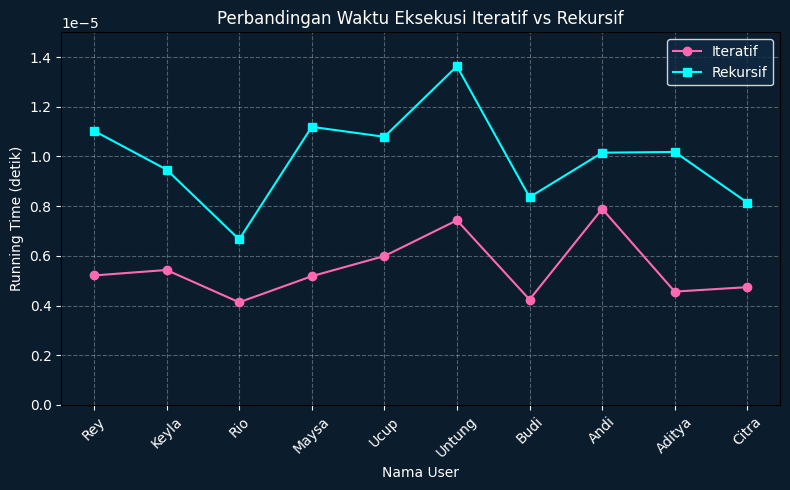

In [ ]:
nama_list = [d["Nama"] for d in data_pengujian]
waktu_it = [d["Waktu_Iteratif"] for d in data_pengujian]
waktu_rek = [d["Waktu_Rekursif"] for d in data_pengujian]
plt.figure(figsize=(8,5))

plt.plot(nama_list, waktu_it, marker='o', label="Iteratif", color='hotpink')
plt.plot(nama_list, waktu_rek, marker='s', label="Rekursif", color='cyan')

plt.title("Perbandingan Waktu Eksekusi Iteratif vs Rekursif", color='white')
plt.xlabel("Nama User", color='white')
plt.ylabel("Running Time (detik)", color='white')

# Background navy
plt.gca().set_facecolor('#0B1C2D')   # area grafik
plt.gcf().set_facecolor('#0B1C2D')   # luar grafik

# Grid
plt.grid(True, linestyle='--', alpha=0.3, color='white')

# Legend
plt.legend(facecolor='#102A43', edgecolor='white', labelcolor='white')

# Tick warna putih
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.ylim(0, max(waktu_it + waktu_rek)*1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



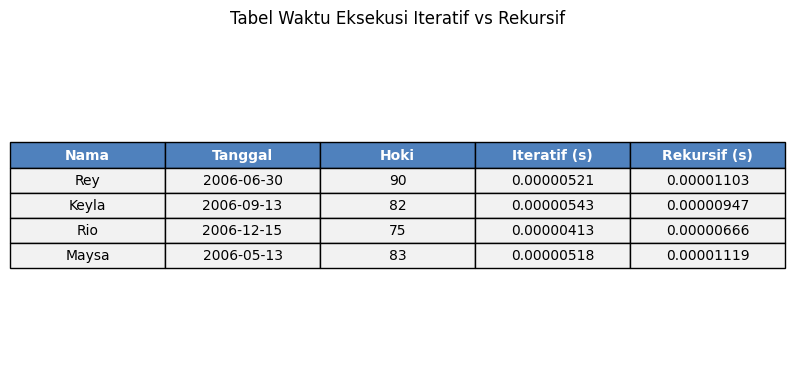

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

table = ax.table(
    cellText=tabel,
    colLabels=["Nama", "Tanggal", "Hoki", "Iteratif (s)", "Rekursif (s)"],
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# ===== WARNA BACKGROUND =====
for (row, col), cell in table.get_celld().items():
    if row == 0:  # header
        cell.set_facecolor("#4F81BD")   # biru
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor("#F2F2F2")   # abu-abu muda

plt.title("Tabel Waktu Eksekusi Iteratif vs Rekursif", pad=20)
plt.show()
